In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import scprep
import numpy as np
import seaborn as sns

In [2]:
res_dir = '../results_Mar4'
adata = sc.read_h5ad('../data/rna_figure_ready.h5ad')


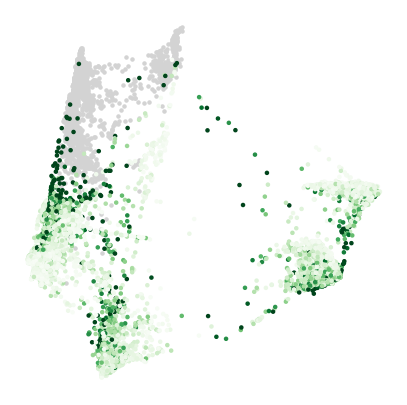

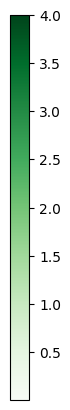

In [6]:
# Extract PHATE coordinates
phate_coords = adata.obsm['X_phate']

# Create a DataFrame for plotting
import pandas as pd
plot_df = pd.DataFrame({
    'PHATE1': phate_coords[:, 0],
    'PHATE2': phate_coords[:, 1],
    'growth': adata.obs['growth']
})

# Create scatter plot
plt.figure(figsize=(5, 5))

# Plot NaN values in gray
nan_data = plot_df[plot_df['growth'].isna()]
plt.scatter(nan_data['PHATE1'], nan_data['PHATE2'], 
           color='lightgray', 
           s=5,
           alpha=1)

# Plot non-NaN values with growth rate coloring
non_nan_data = plot_df.dropna(subset=['growth'])
scatter = plt.scatter(non_nan_data['PHATE1'], non_nan_data['PHATE2'], 
                c=non_nan_data['growth'], 
                cmap='Greens',
                s=5,
                vmin=non_nan_data['growth'].min(),
                vmax=4)

plt.box(False)
plt.tick_params(left=False, bottom=False)
plt.xticks([])
plt.yticks([])

# Save the figure
plt.savefig(f'{res_dir}/growth_rate.pdf', bbox_inches='tight', transparent=True, dpi=300)
plt.show()

# Create a figure just for the colorbar/legend
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
# Create a dummy scatter plot with a single point
scatter = ax.scatter([0], [0], c=[non_nan_data['growth'].iloc[0]], 
                    cmap='Greens', s=5)
# Only show the colorbar
cbar = plt.colorbar(scatter)
# Set the colorbar limits to match the full range
cbar.mappable.set_clim(non_nan_data['growth'].min(), 4)
# Hide the axes and the scatter point
ax.set_visible(False)
plt.savefig(f'{res_dir}/growth_rate_legend.pdf', bbox_inches='tight', transparent=True, dpi=300)
plt.show()